In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader.yahoo.daily import YahooDailyReader
import yfinance as yf

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['GOOG','MSFT']

# Set up End and Start times for data grab

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [GOOG, MSFT]
company_name = ["GOOGLE", "MSFT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


In [87]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,120.126100,121.513120,118.774674,120.142421,120.142421,2.695577e+07
std,18.277129,18.196058,18.182458,18.184906,18.184906,1.060279e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,103.568499,104.691586,102.357689,103.589998,103.589998,2.013650e+07
50%,118.453999,119.931000,117.117699,118.825001,118.825001,2.461250e+07
75%,137.111145,138.404129,135.722248,137.012375,137.012375,3.103952e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,9.779860e+07


In [45]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2021-03-04 00:00:00-05:00 to 2023-03-03 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          504 non-null    float64
 1   High          504 non-null    float64
 2   Low           504 non-null    float64
 3   Close         504 non-null    float64
 4   Adj Close     504 non-null    float64
 5   Volume        504 non-null    int64  
 6   company_name  504 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.5+ KB


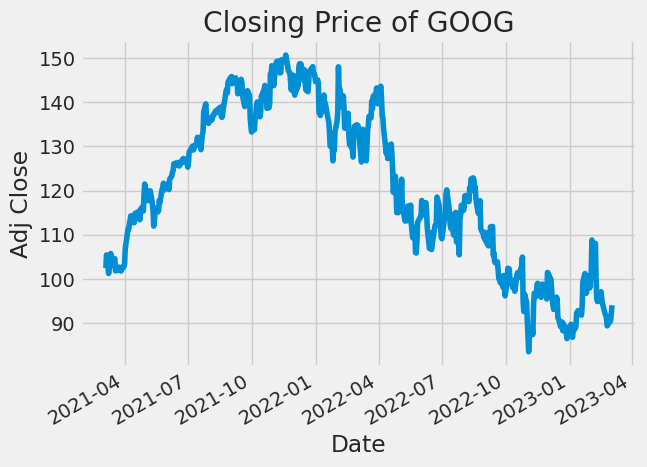

In [46]:
GOOG['Adj Close'].plot()
plt.ylabel("Adj Close")
plt.xlabel("Date")
plt.title('Closing Price of GOOG')

plt.show()

In [47]:
df = DataReader('GOOG', data_source='stooq', start='2014-01-01', end=datetime.now())


In [48]:
from sklearn.preprocessing import MinMaxScaler
df = DataReader('GOOG', data_source='stooq', start='2014-01-01', end=datetime.now())
data = df.filter(items=['Close'])[-1::-1]
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []


dat_size = 100
pred_size = 10

for i in range(dat_size, len(train_data)-pred_size, pred_size):
    x_train.append(train_data[i-dat_size:i, 0])
    y_train.append(train_data[i:i+pred_size, 0])
    if i<= dat_size+1:
        print(x_train)
        print(y_train)
        print()
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))

[array([0.02613786, 0.02674461, 0.02554697, 0.029588  , 0.02952455,
       0.03061115, 0.02006242, 0.01808354, 0.02472607, 0.02839037,
       0.01919393, 0.01508945, 0.01585086, 0.01740541, 0.02537644,
       0.01727057, 0.01430424, 0.016759  , 0.013638  , 0.01293211,
       0.00937092, 0.00975559, 0.0139394 , 0.01352696, 0.01538687,
       0.01403061, 0.01398302, 0.00895849, 0.00690426, 0.0073167 ,
       0.01038217, 0.01481978, 0.0160769 , 0.013523  , 0.01087788,
       0.01113565, 0.01439942, 0.01476029, 0.01839683, 0.02082383,
       0.02385362, 0.02910816, 0.02741481, 0.0267803 , 0.02670495,
       0.0243414 , 0.02077624, 0.0206652 , 0.0243295 , 0.02529316,
       0.0275893 , 0.02696668, 0.02628855, 0.02331825, 0.02348084,
       0.02051451, 0.02001087, 0.02411932, 0.02472607, 0.02530506,
       0.02871159, 0.02858072, 0.03414458, 0.03309367, 0.03358542,
       0.03280814, 0.03573879, 0.03560792, 0.03655572, 0.03557223,
       0.03114652, 0.0331254 , 0.03115049, 0.03435476, 0.0366

In [49]:
#df.sort_values()

Text(0, 0.5, 'Close Price (USD)')

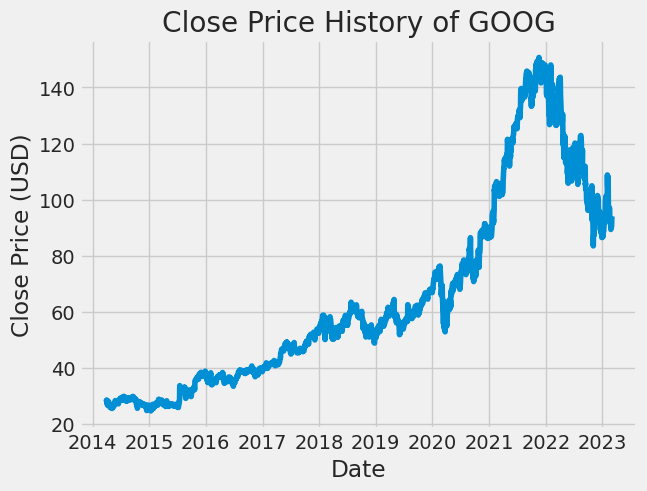

In [50]:
plt.title('Close Price History of GOOG')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')

In [51]:
data = df.filter(items=['Close'])[-1::-1]
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))
training_data_len

1800

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02613786],
       [0.02674461],
       [0.02554697],
       ...,
       [0.52253899],
       [0.53681547],
       [0.55037813]])

In [62]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []


dat_size = 10
pred_size = 1

for i in range(dat_size, len(train_data)-pred_size, pred_size):
    x_train.append(train_data[i-dat_size:i, 0])
    y_train.append(train_data[i:i+pred_size, 0])
    if i<= dat_size+1:
        print(x_train)
        print(y_train)
        print()
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)

[array([0.02613786, 0.02674461, 0.02554697, 0.029588  , 0.02952455,
       0.03061115, 0.02006242, 0.01808354, 0.02472607, 0.02839037])]
[array([0.01919393])]

[array([0.02613786, 0.02674461, 0.02554697, 0.029588  , 0.02952455,
       0.03061115, 0.02006242, 0.01808354, 0.02472607, 0.02839037]), array([0.02674461, 0.02554697, 0.029588  , 0.02952455, 0.03061115,
       0.02006242, 0.01808354, 0.02472607, 0.02839037, 0.01919393])]
[array([0.01919393]), array([0.01508945])]

(1789, 10, 1)
(1789, 1, 1)


In [63]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

1789/1789 [==============================] - 7s 3ms/step - loss: 0.0010


In [64]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - dat_size: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(dat_size, len(test_data)):
    x_test.append(test_data[i-dat_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

9.924495990567909

/tmp/ipykernel_73346/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


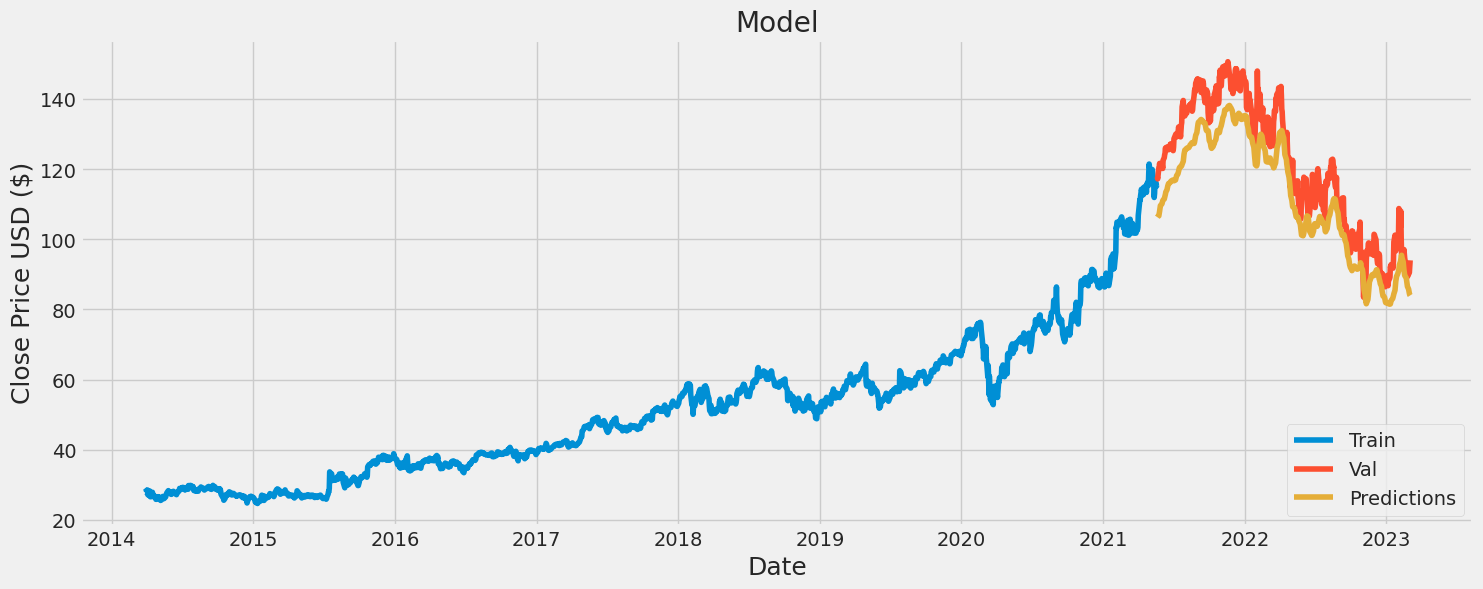

In [65]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [66]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import RNN, LSTMCell, Dense
from tensorflow.keras.backend import dot
from tensorflow.keras import activations, initializers
from keras.models import Sequential
tf.random.set_seed(100)

In [67]:
class LSTM(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        self.units = 2*units
        self.state_size = [self.units, self.units]
        
        self.activation = activations.get('tanh')
        self.recurrent_activation = activations.get('hard_sigmoid')
        self.kernel_initializer = initializers.glorot_uniform(seed=1000)
        self.recurrent_initializer = initializers.get('orthogonal')
        self.bias_initializer = initializers.get('zeros')
        
        super(LSTM, self).__init__(**kwargs)

    def build(self, input_shape):
        self.ft = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ft')
        self.ft_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='ft_b')
        self.c = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ct')
        self.c_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='c_b')
        self.o = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ot')
        self.o_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='o_b')
        self.it = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='it')
        self.it_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='i_b')

        self.built = True

    def call(self, inputs, states):
        h,c = states[0], states[1]
        
        x = tf.concat([h,inputs], axis=-1)
        
        y_ft = self.recurrent_activation(dot(x, self.ft) + self.ft_b)
        
        y_it = self.recurrent_activation(dot(x, self.it) + self.it_b)
        
        y_c = self.activation(dot(x, self.c) + self.c_b)
        
        
        c = c * y_ft + y_it * y_c
        
        y_o = self.recurrent_activation(dot(x, self.o) + self.o_b)
        
        
        h = y_o * self.activation(c)
        
        output = h
        
        return output, [h,c]

In [68]:
# Build the LSTM model
cell = LSTM(8)
layer = RNN(cell, return_sequences=True)

cell2 = LSTM(300)
layer2 = RNN(cell2, return_sequences=False)
model = Sequential()
model.add(layer)
model.add(layer2)
model.add(Dense(35))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

 463/1789 [======>.......................] - ETA: 25s - loss: 0.0017

KeyboardInterrupt: 

In [69]:
#Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - dat_size: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(dat_size, len(test_data)):
    x_test.append(test_data[i-dat_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)


# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

forecast = np.zeros([len(x_test), 1])
x_now = x_test[0].reshape(1,x_test.shape[1],1)
print(x_now[0])
for i in range(len(forecast)):
    x_ = model.predict(x_now)
        
    forecast[i] = x_
    
    x_now[:][:-1] = x_now[:][1:]
    if (i%len(forecast) == 0):
        x_now[:][-1] = x_test[i]
    else:
        x_now[:][-1] = x_

print(x_now[0])

forecast = scaler.inverse_transform(forecast)


# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)

rmse2 = np.sqrt(np.mean(((forecast - y_test) ** 2)))
print(rmse2)

[[0.74904328]
 [0.75591185]
 [0.73329949]
 [0.72025238]
 [0.69261946]
 [0.70169295]
 [0.72318699]
 [0.72526501]
 [0.71814263]
 [0.72023651]]
[[0.08499249]
 [0.08499249]
 [0.08499249]
 [0.08499249]
 [0.08499249]
 [0.08499249]
 [0.08499249]
 [0.08499249]
 [0.08499249]
 [0.08499249]]
7.633841666179792
85.98558202267513


/tmp/ipykernel_73346/1784730816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
/tmp/ipykernel_73346/1784730816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Forecast'] = forecast


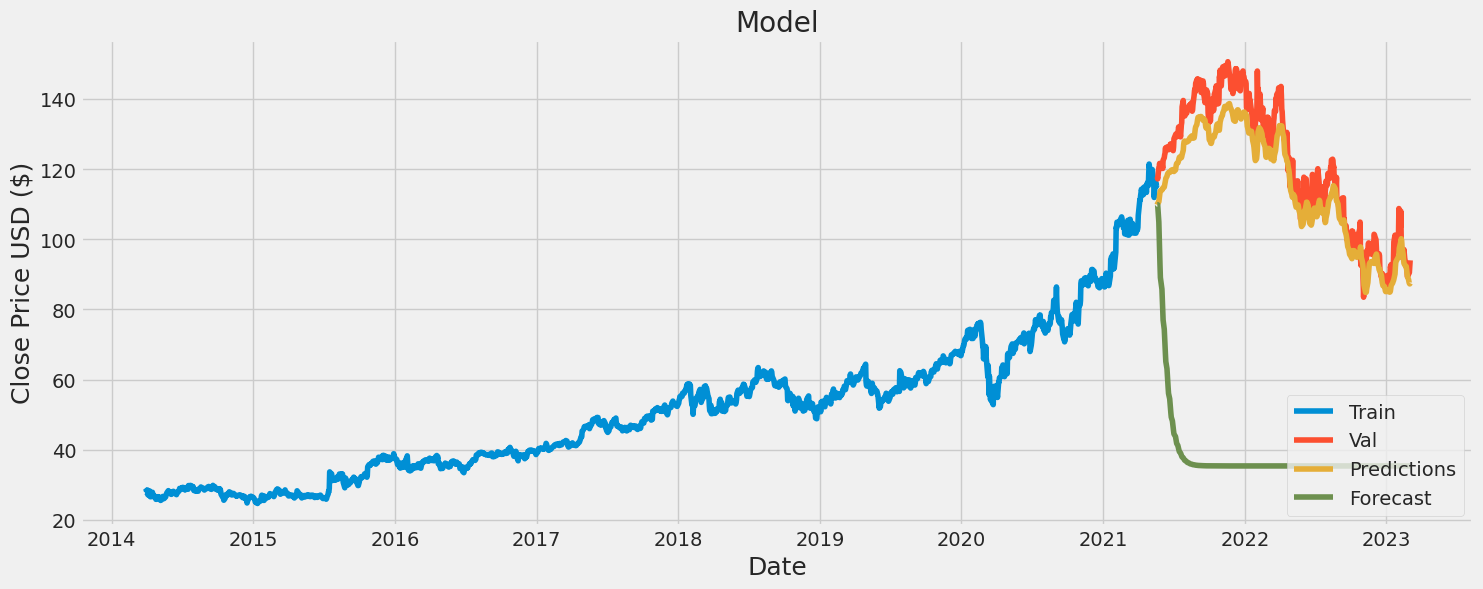

In [70]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid['Forecast'] = forecast
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions', 'Forecast']])
plt.legend(['Train', 'Val', 'Predictions', 'Forecast'], loc='lower right')
plt.show()

/tmp/ipykernel_73346/178313092.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
/tmp/ipykernel_73346/178313092.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Forecast'] = forecast


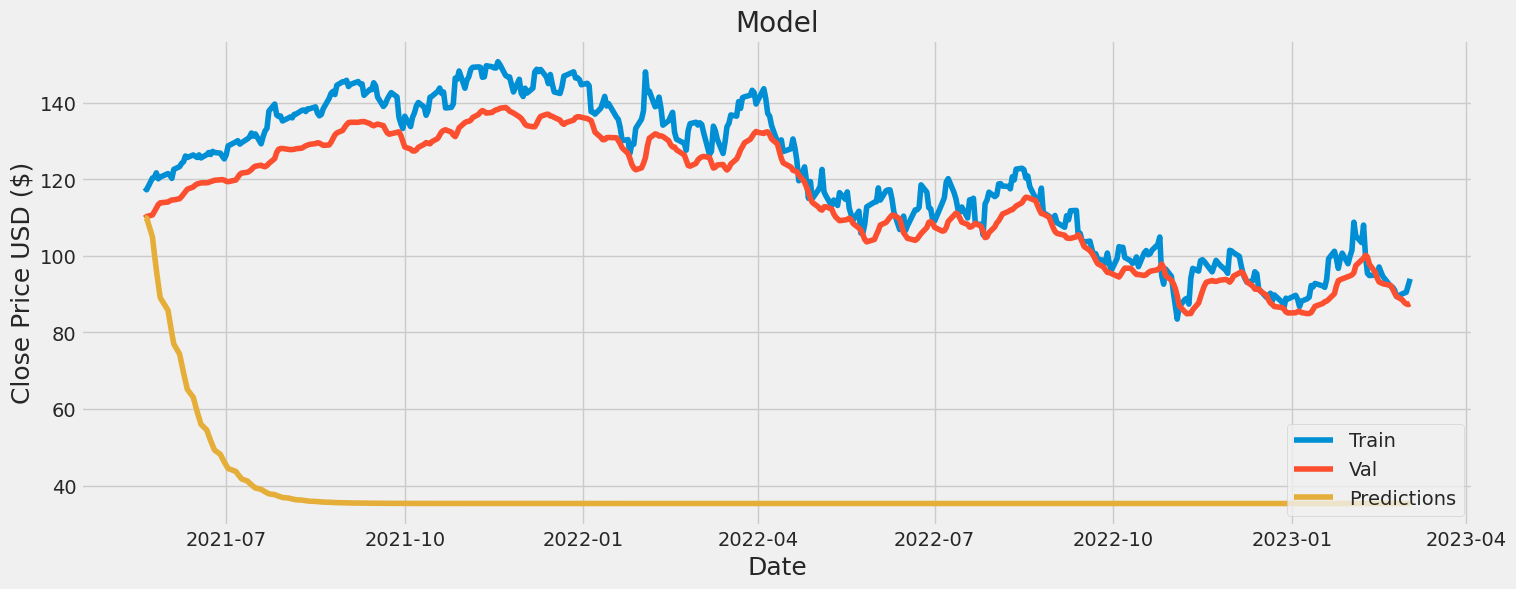

In [71]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid['Forecast'] = forecast
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#10plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions', 'Forecast']])
plt.legend(['Train', 'Val', 'Predictions', 'Forecast'], loc='lower right')
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader.data import DataReader
from datetime import datetime
import numpy as np
df = DataReader('GOOG', data_source='stooq', start='2014-01-01', end=datetime.now())
data = df.filter(items=['Close'])[-1::-1]
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []


dat_size = 10

for i in range(dat_size, len(train_data)):
    x_train.append(train_data[i-dat_size:i, 0])
    y_train.append(train_data[i, 0])
    if i<= dat_size+1:
        print(x_train)
        print(y_train)
        print()
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))

[array([0.02613786, 0.02674461, 0.02554697, 0.029588  , 0.02952455,
       0.03061115, 0.02006242, 0.01808354, 0.02472607, 0.02839037])]
[0.01919393408231973]

[array([0.02613786, 0.02674461, 0.02554697, 0.029588  , 0.02952455,
       0.03061115, 0.02006242, 0.01808354, 0.02472607, 0.02839037]), array([0.02674461, 0.02554697, 0.029588  , 0.02952455, 0.03061115,
       0.02006242, 0.01808354, 0.02472607, 0.02839037, 0.01919393])]
[0.01919393408231973, 0.01508944611223692]



In [23]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from CV_quantum_layers import QuantumLayer_MultiQunode, Activation_Layer
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import RNN, LSTMCell, Dense
from tensorflow.keras.backend import dot
from tensorflow.keras import activations, initializers
from tensorflow.keras import regularizers
from keras.models import Sequential
tf.random.set_seed(100)

class QLSTM(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = [self.units, self.units]
        
        self.activation = activations.get('tanh')
        self.recurrent_activation = activations.get('hard_sigmoid')
        self.kernel_initializer = initializers.get('glorot_uniform')
        
        super(QLSTM, self).__init__(**kwargs)

    def build(self, input_shape):
        max_initial_weight = 0.2
        self.f = Dense(units=2*self.units,
                       input_shape=[input_shape[-1] + self.units])
        
        self.f_q = QuantumLayer_MultiQunode(
                                            self.units,
                                            1,
                                            1,
                                            5,
                                            encoding_method="Amplitude_Phase",
                                            regularizer=regularizers.L1(l1=0.01),
                                            max_initial_weight=max_initial_weight
                                            )
        self.quantum_preparation_layer = Activation_Layer("TanH", self.f_q.encoding_object)
        
        self.i = Dense(units=2*self.units,
                       input_shape=[input_shape[-1] + self.units])
        
        """self.i_q = QuantumLayer_MultiQunode(
                                    self.units,
                                    1,
                                    1,
                                    5,
                                    encoding_method="Amplitude_Phase",
                                    regularizer=regularizers.L1(l1=0.01),
                                    max_initial_weight=max_initial_weight
                                    )"""
        
        self.c = Dense(units=2*self.units,
                       input_shape=[input_shape[-1] + self.units])
        
        """self.c_q = QuantumLayer_MultiQunode(
                                    self.units,
                                    1,
                                    1,
                                    5,
                                    encoding_method="Amplitude_Phase",
                                    regularizer=regularizers.L1(l1=0.01),
                                    max_initial_weight=max_initial_weight
                                    )"""
        self.o = Dense(units=2*self.units,
                       input_shape=[input_shape[-1] + self.units])
        
        """self.o_q = QuantumLayer_MultiQunode(
                                    self.units,
                                    1,
                                    1,
                                    5,
                                    encoding_method="Amplitude_Phase",
                                    regularizer=regularizers.L1(l1=0.01),
                                    max_initial_weight=max_initial_weight
                                    )"""
        

        self.built = True

    def call(self, inputs, states):
        h,c = states[0], states[1]
        
        x = tf.concat([h,inputs], axis=-1)
        #print(self.f_q.circuit_layer[0](tf.zeros([3])))
        y_ft = self.f(x)
        y_ft = self.quantum_preparation_layer(y_ft)
        y_ft = self.f_q(x)
        y_ft = self.recurrent_activation(y_ft)
        
        y_it = self.recurrent_activation(self.i(x))
        
        y_c = self.recurrent_activation(self.c(x))
        
        c = c * y_ft + y_it * y_c
        
        y_o = self.recurrent_activation(self.o(x))
        
        h = y_o * self.activation(c)
        
        output = h
        
        return output, [h,c]
    
cell2 = QLSTM(2)
layer2 = RNN(cell2, return_sequences=False)
model = Sequential()
model.add(layer2)
model.add(Dense(35))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
#model.save('Trained_QLSTM')

<Quantum Keras Layer: func=cv_nn>
<Quantum Keras Layer: func=cv_nn>


AttributeError: in user code:

    File "/home/st4eve/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/home/st4eve/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/st4eve/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/home/st4eve/.local/lib/python3.10/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/home/st4eve/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/st4eve/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None

    AttributeError: Exception encountered when calling layer "qlstm_13" (type QLSTM).
    
    in user code:
    
        File "/tmp/ipykernel_85067/3976447112.py", line 89, in call  *
            y_ft = self.f_q(x)
        File "/home/st4eve/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
    
        AttributeError: Exception encountered when calling layer "quantum_layer__multi_qunode" (type QuantumLayer_MultiQunode).
        
        in user code:
        
            File "/home/st4eve/Desktop/CV_RNN/CV_quantum_layers.py", line 431, in call  *
                output = self.circuit_layer[0](x)
            File "/home/st4eve/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler  **
                raise e.with_traceback(filtered_tb) from None
        
            AttributeError: Exception encountered when calling layer "keras_layer" (type KerasLayer).
            
            in user code:
            
                File "/home/st4eve/.local/lib/python3.10/site-packages/pennylane/qnn/keras.py", line 305, in call  *
                    return self._evaluate_qnode(inputs)
                File "/home/st4eve/.local/lib/python3.10/site-packages/pennylane/qnn/keras.py", line 305, in call  *
                    return self._evaluate_qnode(inputs)
                File "/home/st4eve/.local/lib/python3.10/site-packages/pennylane/qnn/keras.py", line 320, in _evaluate_qnode  *
                    return self.qnode(**kwargs)
                File "/home/st4eve/.local/lib/python3.10/site-packages/pennylane/qnode.py", line 847, in __call__  *
                    res = qml.execute(
                File "/home/st4eve/.local/lib/python3.10/site-packages/pennylane/interfaces/execution.py", line 651, in execute  *
                    qml.interfaces.cache_execute(
                File "/home/st4eve/.local/lib/python3.10/site-packages/pennylane/_device.py", line 532, in batch_execute  *
                    self.reset()
                File "/home/st4eve/.local/lib/python3.10/site-packages/pennylane_sf/tf.py", line 234, in reset  *
                    super().reset()
                File "/home/st4eve/.local/lib/python3.10/site-packages/pennylane_sf/simulator.py", line 175, in reset  *
                    self.eng.reset()
                File "/home/st4eve/.local/lib/python3.10/site-packages/strawberryfields/engine.py", line 416, in reset  *
                    self.backend.reset(**self.backend_options)
                File "/home/st4eve/.local/lib/python3.10/site-packages/strawberryfields/backends/tfbackend/backend.py", line 133, in reset  *
                    self._modemap.reset()
            
                AttributeError: 'NoneType' object has no attribute 'reset'
            
            
            Call arguments received:
              • inputs=tf.Tensor(shape=(1, 3), dtype=float32)
        
        
        Call arguments received:
          • x=tf.Tensor(shape=(1, 3), dtype=float32)
    
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(1, 1), dtype=float32)
      • states=('tf.Tensor(shape=(1, 2), dtype=float32)', 'tf.Tensor(shape=(1, 2), dtype=float32)')
